## Weather Prediction Model

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
weather = pd.read_csv('noaa.csv', index_col='DATE')

In [111]:
weather.tail()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
2023-05-06,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,8.72,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-07,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,7.61,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-08,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,11.18,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-09,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,11.18,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-10,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,14.09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Prepping Data For Machine Learning

In [112]:
weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2023-05-01', '2023-05-02', '2023-05-03', '2023-05-04', '2023-05-05',
       '2023-05-06', '2023-05-07', '2023-05-08', '2023-05-09', '2023-05-10'],
      dtype='object', name='DATE', length=17327)

In [113]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.662723
ACSH       0.662723
AWND       0.508282
DAPR       0.999538
FMTM       0.873608
FRGT       0.999885
MDPR       0.999538
PGTM       0.508686
PRCP       0.016275
SNOW       0.343222
SNWD       0.336065
TAVG       0.882438
TMAX       0.000635
TMIN       0.000808
TSUN       0.933572
WDF1       0.662723
WDF2       0.508224
WDF5       0.513303
WDFG       0.753737
WSF1       0.662723
WSF2       0.508166
WSF5       0.513303
WSFG       0.753737
WT01       0.777688
WT02       0.980204
WT03       0.992497
WT04       0.999769
WT05       0.998326
WT07       0.999885
WT08       0.813355
WT09       0.999885
WT16       0.887170
WT18       0.999827
dtype: float64

In [114]:
core_weather = weather[['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN']].copy()

In [115]:
core_weather.columns = ['precip', 'snow', 'snow_depth', 'temp_max', 'temp_min' ]

In [116]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.00,0.0,0.0,49.0,30.0
1960-01-02,0.00,0.0,0.0,49.0,29.0
1960-01-03,0.00,0.0,0.0,54.0,35.0
1960-01-04,0.00,0.0,0.0,54.0,36.0
1960-01-05,0.00,0.0,0.0,55.0,33.0
...,...,...,...,...,...
2023-05-06,0.10,NaN,NaN,62.0,51.0
2023-05-07,0.00,NaN,NaN,64.0,48.0
2023-05-08,0.03,NaN,NaN,64.0,51.0


## Filling in the missing values 

In [117]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip        0.016275
snow          0.343222
snow_depth    0.336065
temp_max      0.000635
temp_min      0.000808
dtype: float64

In [118]:
core_weather['snow'].value_counts()

0.0    11379
1.0        1
Name: snow, dtype: int64

In [119]:
del core_weather['snow']

In [120]:
del core_weather['snow_depth']

In [121]:
core_weather[pd.isnull(core_weather['precip'])]

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0
2016-05-08,NaN,67.0,56.0


In [122]:
core_weather.loc['10/20/83':'11/5/83', :]

,precip,temp_max,temp_min
DATE,,,


In [123]:
core_weather['precip'].value_counts()

0.00    14050
0.01      443
0.02      202
0.03      124
0.04      105
        ...  
1.05        1
1.38        1
1.95        1
2.01        1
1.28        1
Name: precip, Length: 179, dtype: int64

In [124]:
core_weather['precip'] = core_weather['precip'].fillna(0)

In [125]:
 core_weather[pd.isnull(core_weather['temp_max'])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2013-06-16,0.0,NaN,NaN
2019-04-18,0.0,NaN,50.0
2019-04-21,0.0,NaN,52.0
2019-04-22,0.0,NaN,50.0
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN
2020-09-09,0.0,NaN,NaN
2021-10-31,0.0,NaN,56.0


In [126]:
core_weather = core_weather.fillna(method='ffill')

In [127]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip      0.0
temp_max    0.0
temp_min    0.0
dtype: float64

## Data Types

In [128]:
core_weather.index.sort_values(ascending=False)

Index(['2023-05-10', '2023-05-09', '2023-05-08', '2023-05-07', '2023-05-06',
       '2023-05-05', '2023-05-04', '2023-05-03', '2023-05-02', '2023-05-01',
       ...
       '1960-01-10', '1960-01-09', '1960-01-08', '1960-01-07', '1960-01-06',
       '1960-01-05', '1960-01-04', '1960-01-03', '1960-01-02', '1960-01-01'],
      dtype='object', name='DATE', length=17327)

In [129]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [130]:
core_weather.index = pd.to_datetime(core_weather.index)
print(core_weather.index)



DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2023-05-01', '2023-05-02', '2023-05-03', '2023-05-04',
               '2023-05-05', '2023-05-06', '2023-05-07', '2023-05-08',
               '2023-05-09', '2023-05-10'],
              dtype='datetime64[ns]', name='DATE', length=17327, freq=None)


In [131]:
#Missing values are labled as 9999 according to documentation
core_weather.apply(lambda x: (x==9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

## EDA

<AxesSubplot:xlabel='DATE'>

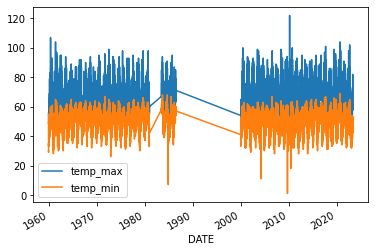

In [132]:
core_weather[['temp_max', 'temp_min']].plot()

In [133]:
#There are alot of years that are missing. 
#this is not a major issue for the model. 
core_weather.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    130
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

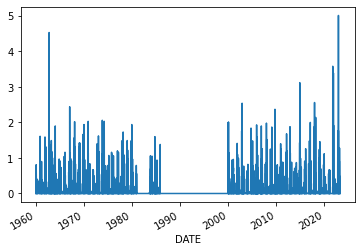

In [134]:
core_weather['precip'].plot()

In [138]:
core_weather.groupby(core_weather.index.year).sum()['precip']

DATE
1960    14.01
1961    13.87
1962    22.47
1963    19.11
1964    16.83
1965    16.32
1966    13.11
1967    23.98
1968    17.19
1969    25.70
1970    25.31
1971    10.61
1972    16.27
1973    29.37
1974    16.87
1975    17.54
1976     8.64
1977    11.70
1978    22.57
1979    23.79
1980    13.58
1983     7.13
1984    16.03
1985     8.50
1986     0.00
2000    21.09
2001    22.84
2002    19.12
2003    11.37
2004    12.97
2005    27.37
2006    22.79
2007    12.79
2008    13.86
2009    14.57
2010    22.67
2011    16.06
2012    22.93
2013     4.89
2014    19.62
2015     8.58
2016    19.77
2017    23.34
2018    16.82
2019    20.00
2020     6.42
2021    20.82
2022    15.38
2023    17.79
Name: precip, dtype: float64

## First Machine Learning Model

In [ ]:
core_weather['target'] = core_weather.shift(-1)

In [139]:
#Creating a Target
core_weather['target'] = core_weather.shift(-1)['temp_max']

In [140]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.00,49.0,30.0,49.0
1960-01-02,0.00,49.0,29.0,54.0
1960-01-03,0.00,54.0,35.0,54.0
1960-01-04,0.00,54.0,36.0,55.0
1960-01-05,0.00,55.0,33.0,53.0
...,...,...,...,...
2023-05-06,0.10,62.0,51.0,64.0
2023-05-07,0.00,64.0,48.0,64.0
2023-05-08,0.03,64.0,51.0,64.0


In [141]:
core_weather = core_weather.iloc[:-1,:].copy()

In [143]:
from sklearn.linear_model import Ridge

In [144]:
reg = Ridge(alpha = 0.1)

In [145]:
predictors = ['precip', 'temp_max', 'temp_min']

In [146]:
train = core_weather.loc[:'2020-12-31']

In [147]:
test = core_weather.loc['2021-01-01':]

In [148]:
reg.fit(train[predictors], train['target'])

Ridge(alpha=0.1)

In [150]:
predictions = reg.predict(test[predictors])

In [178]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [152]:
mean_absolute_error(test['target'], predictions)

3.3055465225065634

## Evaluvating Ridge Model

In [153]:
combined = pd.concat([test['target'], pd.Series(predictions, index = test.index)], axis = 1)

In [156]:
combined.columns = ['actual', 'predictions']
combined

,actual,predictions
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266
...,...,...
2023-05-05,62.0,62.642408
2023-05-06,64.0,63.004165
2023-05-07,64.0,64.128101


<AxesSubplot:xlabel='DATE'>

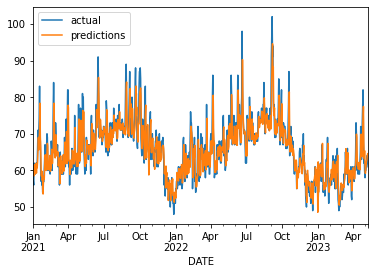

In [157]:
combined.plot()

In [158]:
reg.coef_

array([-2.20730384,  0.72113834,  0.17969047])

In [179]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:'2020-12-31']
    test = core_weather.loc['2021-01-01':]
    reg.fit(train[predictors], train['target'])
    predictions = reg.predict(test[predictors])
    error = mean_squared_error(test["target"], predictions)
    combined = pd.concat([test['target'], pd.Series(predictions, index = test.index)], axis = 1)
    combined.columns = ['actual', 'predictions']
    return error, combined
    

In [162]:
core_weather['month_max'] = core_weather['temp_max'].rolling(30).mean()

In [163]:
core_weather

,precip,temp_max,temp_min,target,month_max
DATE,,,,,
1960-01-01,0.00,49.0,30.0,49.0,NaN
1960-01-02,0.00,49.0,29.0,54.0,NaN
1960-01-03,0.00,54.0,35.0,54.0,NaN
1960-01-04,0.00,54.0,36.0,55.0,NaN
1960-01-05,0.00,55.0,33.0,53.0,NaN
...,...,...,...,...,...
2023-05-05,0.10,61.0,53.0,62.0,64.500000
2023-05-06,0.10,62.0,51.0,64.0,64.533333
2023-05-07,0.00,64.0,48.0,64.0,64.666667


## Adding Additional Predictors

In [164]:
core_weather['month_day_max'] = core_weather['month_max'] / core_weather['temp_max']

<AxesSubplot:>

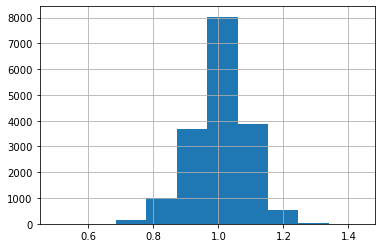

In [168]:
core_weather['month_day_max'].hist()

In [169]:
core_weather['max_min'] = core_weather['temp_max'] / core_weather['temp_min']

In [170]:
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min
DATE,,,,,,,
1960-01-01,0.00,49.0,30.0,49.0,NaN,NaN,1.633333
1960-01-02,0.00,49.0,29.0,54.0,NaN,NaN,1.689655
1960-01-03,0.00,54.0,35.0,54.0,NaN,NaN,1.542857
1960-01-04,0.00,54.0,36.0,55.0,NaN,NaN,1.500000
1960-01-05,0.00,55.0,33.0,53.0,NaN,NaN,1.666667
...,...,...,...,...,...,...,...
2023-05-05,0.10,61.0,53.0,62.0,64.500000,1.057377,1.150943
2023-05-06,0.10,62.0,51.0,64.0,64.533333,1.040860,1.215686
2023-05-07,0.00,64.0,48.0,64.0,64.666667,1.010417,1.333333


In [173]:
predictors = ['precip', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'max_min']

In [174]:
core_weather = core_weather.iloc[30:,:].copy()

In [180]:
error, combined = create_predictions(predictors, core_weather, reg)

In [181]:
error

19.166104731018518

<AxesSubplot:xlabel='DATE'>

<Figure size 576x576 with 0 Axes>

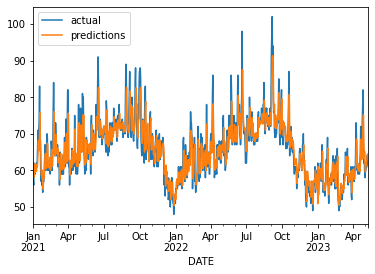

In [188]:
fig = plt.figure(figsize = (8,8))
combined.plot()

In [192]:
core_weather['monthly_avg'] = core_weather['temp_max'].groupby(core_weather.index.month).apply(lambda x : x.expanding(1).mean())
core_weather["day_of_year_avg"] = core_weather["temp_max"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())


In [193]:
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000,59.000000
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000,62.000000
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000,59.000000
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000,59.000000
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000,60.000000
...,...,...,...,...,...,...,...,...,...
2023-05-05,0.10,61.0,53.0,62.0,64.500000,1.057377,1.150943,67.161423,65.479167
2023-05-06,0.10,62.0,51.0,64.0,64.533333,1.040860,1.215686,67.157895,65.770833
2023-05-07,0.00,64.0,48.0,64.0,64.666667,1.010417,1.333333,67.155738,67.479167


In [194]:
predictors = ['precip', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'max_min', 'monthly_avg', 'day_of_year_avg']

In [195]:
error, combined =  create_predictions(predictors, core_weather, reg)

In [197]:
error

18.6947001053931

## Model Diagnostics

In [200]:
core_weather.corr()['target']

precip            -0.204206
temp_max           0.822252
temp_min           0.596316
target             1.000000
month_max          0.687878
month_day_max     -0.420956
max_min            0.044857
monthly_avg        0.690669
day_of_year_avg    0.712382
Name: target, dtype: float64

In [201]:
combined['diff'] = (combined['actual'] - combined['predictions']).abs()

<AxesSubplot:>

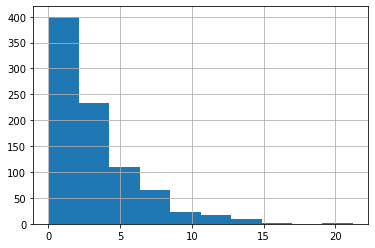

In [203]:
combined['diff'].hist()